In [ ]:
!pip install -U ipywidgets

In [ ]:
!pip install openai
!pip install langchain

In [ ]:
# Jupyter Extension을 prelease 버전으로 해야 제대로 로딩됨 

from ipywidgets import FileUpload
from IPython.display import display

uploader = FileUpload(accept='.docx', multiple=True)
display(uploader)

In [ ]:
print(uploader.value[0])

In [ ]:
bytes_data = uploader.value[0].content.tobytes()

In [ ]:
print(type(bytes_data))

In [ ]:
import os

def save_uploaded_docx(uploader):
    uploaded_file = list(uploader.value)[0]
    file_name = uploaded_file['name']
    save_path = os.path.join(os.getcwd(), file_name)
    with open(save_path, 'wb') as f:
        f.write(uploaded_file['content'])
    
    print(f'Uploaded and saved: {file_name}')
    return file_name

file_name = save_uploaded_docx(uploader)


In [ ]:
!pip install pydocx

In [ ]:
!pip install python-docx

In [ ]:
from docx import Document

def load_docx(file_name):
    doc = Document(file_name)
    paragraphs = [paragraph.text for paragraph in doc.paragraphs]
    return paragraphs

# DOCX 파일 로드 및 내용 추출

paragraphs = load_docx(file_name)

# 추출된 내용 출력
for paragraph in paragraphs:
    print(paragraph)


In [ ]:
from docx import Document
from langchain.text_splitter import CharacterTextSplitter

# DOCX 파일 로드
def load_docx(file_name):
    doc = Document(file_name)
    paragraphs = [paragraph.text for paragraph in doc.paragraphs]
    return paragraphs


# DOCX 파일 로드
documents = load_docx(file_name)

# 텍스트 분할기 생성
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)

# 문서 분할
docs = text_splitter.split_documents(documents)
len(docs)


In [ ]:
from docx import Document

def extract_text_from_docx(file_path):
    doc = Document(file_path)
    text = [paragraph.text for paragraph in doc.paragraphs]
    return '\n'.join(text)


In [ ]:
from langchain.chains.summarize import load_summarize_chain
from langchain.chat_models import ChatOpenAI

def process_text_with_model(text):
    chat = ChatOpenAI(model_name='gpt-3.5-turbo', temperature=0.9)
    chain = load_summarize_chain(chat, chain_type="map_reduce", verbose=True)
    result = chain.run(text)
    return result


In [ ]:
def process_docx_with_model(file_path):
    text = extract_text_from_docx(file_path)
    result = process_text_with_model(text)
    return result


In [ ]:
file_path = file_name
result = process_docx_with_model(file_path)
print(result)


In [ ]:
!pip install Flask

In [ ]:
from flask import Flask, request, render_template, flash, redirect
import os

app = Flask(__name__)

UPLOAD_FOLDER = 'uploads'
ALLOWED_EXTENSIONS = {'docx'}

app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

def allowed_file(filename):
    return '.' in filename and \
           filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS

@app.route('/', methods=['GET', 'POST'])
def upload_file():
    if request.method == 'POST':
        # 파일이 업로드되었는지 확인
        if 'file' not in request.files:
            flash('파일이 없습니다.')
            return redirect(request.url)
        file = request.files['file']
        # 파일이 비어있는지 확인
        if file.filename == '':
            flash('파일이 선택되지 않았습니다.')
            return redirect(request.url)
        # 허용된 확장자인지 확인
        if file and allowed_file(file.filename):
            filename = secure_filename(file.filename)
            # 업로드된 파일을 저장
            file.save(os.path.join(app.config['UPLOAD_FOLDER'], filename))
            # 파일이 성공적으로 업로드되었음을 알림
            flash('파일이 성공적으로 업로드되었습니다.')
            return redirect('/')
    return render_template('upload.html')

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
!pip install transformers

In [ ]:
from docx import Document
from transformers import GPT2LMHeadModel, GPT2Tokenizer

def extract_qa_pairs_from_docx(file_path):
    doc = Document(file_path)
    qa_pairs = []
    for paragraph in doc.paragraphs:
        if "질문:" in paragraph.text and "대답:" in paragraph.text:
            question, answer = paragraph.text.split("질문:")[1].split("대답:")
            qa_pairs.append((question.strip(), answer.strip()))
    return qa_pairs

def preprocess_qa_pairs(qa_pairs):
    preprocessed_qa_pairs = []
    for question, answer in qa_pairs:
        preprocessed_qa_pairs.append((question.lower(), answer.lower()))
    return preprocessed_qa_pairs

def train_model(qa_pairs):
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    model = GPT2LMHeadModel.from_pretrained("gpt2")
    inputs = tokenizer([pair[0] for pair in qa_pairs], return_tensors="pt", padding=True, truncation=True)
    labels = tokenizer([pair[1] for pair in qa_pairs], return_tensors="pt", padding=True, truncation=True)["input_ids"]
    outputs = model(**inputs, labels=labels)
    loss = outputs.loss
    return loss

def evaluate_model(model, qa_pairs):
    # 모델 평가 코드를 작성
    pass

def test_model(model, test_data):
    # 모델 테스트 코드를 작성
    pass

# 데이터 수집
docx_file_path = "BPD_Cost Element 관리_20240401101315.docx"
qa_pairs = extract_qa_pairs_from_docx(docx_file_path)

# 데이터 전처리
preprocessed_qa_pairs = preprocess_qa_pairs(qa_pairs)

# 모델 훈련
loss = train_model(preprocessed_qa_pairs)

# 모델 평가
evaluate_model(model, preprocessed_qa_pairs)

# 모델 테스트
test_data = [...]
test_model(model, test_data)


In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
from docx import Document
from transformers import GPT2LMHeadModel, GPT2Tokenizer

def extract_qa_pairs_from_docx(file_path):
    doc = Document(file_path)
    qa_pairs = []
    for paragraph in doc.paragraphs:
        if "질문:" in paragraph.text and "대답:" in paragraph.text:
            question, answer = paragraph.text.split("질문:")[1].split("대답:")
            qa_pairs.append((question.strip(), answer.strip()))
    return qa_pairs

def preprocess_qa_pairs(qa_pairs):
    preprocessed_qa_pairs = []
    for question, answer in qa_pairs:
        preprocessed_qa_pairs.append((question.lower(), answer.lower()))
    return preprocessed_qa_pairs

def train_model(qa_pairs):
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    model = GPT2LMHeadModel.from_pretrained("gpt2")

    # 패딩 토큰 설정
    tokenizer.pad_token = tokenizer.eos_token

    # 데이터 토큰화 및 패딩
    inputs = tokenizer([pair[0] for pair in qa_pairs], return_tensors="pt", padding=True, truncation=True, encoding=["utf-8"])
    labels = tokenizer([pair[1] for pair in qa_pairs], return_tensors="pt", padding=True, truncation=True, encoding=["utf-8"])["input_ids"]

    
    # 모델 훈련
    outputs = model(**inputs, labels=labels)
    loss = outputs.loss
    return loss

def evaluate_model(model, qa_pairs):
    # 모델 평가 코드를 작성
    pass

def test_model(model, test_data):
    # 모델 테스트 코드를 작성
    pass

# 데이터 수집
docx_file_path = "BPD_Cost Element 관리_20240401101315.docx"
qa_pairs = extract_qa_pairs_from_docx(docx_file_path)

# 데이터 전처리
preprocessed_qa_pairs = preprocess_qa_pairs(qa_pairs)

# 모델 훈련
loss = train_model(preprocessed_qa_pairs)

# 모델 평가
# evaluate_model(model, preprocessed_qa_pairs)  # 모델 평가 함수가 정의되지 않았습니다.

# 모델 테스트
test_data = [...]  # 테스트 데이터가 정의되지 않았습니다.
# test_model(model, test_data)  # 모델 테스트 함수가 정의되지 않았습니다.


In [ ]:
from docx import Document
from transformers import GPT2LMHeadModel, GPT2Tokenizer

def extract_qa_pairs_from_docx(file_path):
    doc = Document(file_path)
    qa_pairs = []
    for paragraph in doc.paragraphs:
        if "질문:" in paragraph.text and "대답:" in paragraph.text:
            question, answer = paragraph.text.split("질문:")[1].split("대답:")
            qa_pairs.append((question.strip(), answer.strip()))
    return qa_pairs

def preprocess_qa_pairs(qa_pairs):
    preprocessed_qa_pairs = []
    for question, answer in qa_pairs:
        preprocessed_qa_pairs.append((question.lower(), answer.lower()))
    return preprocessed_qa_pairs

def train_model(qa_pairs):
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    model = GPT2LMHeadModel.from_pretrained("gpt2")

    # 패딩 토큰 설정
    tokenizer.pad_token = tokenizer.eos_token

    # 데이터 토큰화 및 패딩
    inputs = tokenizer([pair[0] for pair in qa_pairs], return_tensors="pt", padding=True, truncation=True, encoding="utf-8")
    labels = tokenizer([pair[1] for pair in qa_pairs], return_tensors="pt", padding=True, truncation=True)["input_ids"]

    # 모델 훈련
    outputs = model(**inputs, labels=labels)
    loss = outputs.loss
    return loss

def evaluate_model(model, qa_pairs):
    # 모델 평가 코드를 작성
    pass

def test_model(model, test_data):
    # 모델 테스트 코드를 작성
    pass

# 데이터 수집
docx_file_path = "BPD_Cost Element 관리_20240401101315.docx"
qa_pairs = extract_qa_pairs_from_docx(docx_file_path)

# 데이터 전처리
preprocessed_qa_pairs = preprocess_qa_pairs(qa_pairs)

# 모델 훈련
loss = train_model(preprocessed_qa_pairs)

# 모델 평가
# evaluate_model(model, preprocessed_qa_pairs)  # 모델 평가 함수가 정의되지 않았습니다.

# 모델 테스트
test_data = [...]  # 테스트 데이터가 정의되지 않았습니다.
# test_model(model, test_data)  # 모델 테스트 함수가 정의되지 않았습니다.


In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

def train_model(qa_pairs):
    # GPT2 모델과 토크나이저 로드
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    model = GPT2LMHeadModel.from_pretrained("gpt2")

    # 패딩 토큰 설정
    tokenizer.pad_token = tokenizer.eos_token

    # 데이터 토큰화 및 패딩
    inputs = tokenizer([pair[0] for pair in qa_pairs], return_tensors="pt", padding=True, truncation=True)
    labels = tokenizer([pair[1] for pair in qa_pairs], return_tensors="pt", padding=True, truncation=True)["input_ids"]

    # 모델 훈련
    outputs = model(**inputs, labels=labels)
    loss = outputs.loss
    return loss

# train_model 함수 호출
loss = train_model(preprocessed_qa_pairs)


In [7]:
from docx import Document

def read_docx(file_path):
    doc = Document(file_path)
    text = ""
    for paragraph in doc.paragraphs:
        text += paragraph.text + "\n"
    return text

# 사용 예시
file_path = "BPD_Cost Element 관리_20240401101315.docx"  # 읽어올 docx 파일의 경로
text = read_docx(file_path)
print(text)


1. 기본정보


2. 업무처리 절차




In [10]:
from docx import Document
from PIL import Image
from io import BytesIO

def extract_images_from_docx(docx_file):
    doc = Document(docx_file)
    images = []
    for part in doc.parts:
        for rel in part.rels:
            if "image" in rel.reltype:
                image_stream = rel.target_part.stream
                image_data = image_stream.read()
                image_stream.close()
                image = Image.open(BytesIO(image_data))
                images.append(image)
    return images

# 사용 예시
docx_file = "BPD_Cost Element 관리_20240401101315.docx"  # docx 파일의 경로
images = extract_images_from_docx(docx_file)
for i, image in enumerate(images):
    image.show()


AttributeError: 'Document' object has no attribute 'parts'

In [11]:
from docx import Document
from PIL import Image
from io import BytesIO

def extract_images_from_docx(docx_file):
    doc = Document(docx_file)
    images = []
    for rel in doc.part.rels:
        if "image" in rel.reltype:
            image_stream = rel.target_part.blob
            image_data = image_stream.read()
            image_stream.close()
            image = Image.open(BytesIO(image_data))
            images.append(image)
    return images

# 사용 예시
docx_file = "BPD_Cost Element 관리_20240401101315.docx"  # docx 파일의 경로
images = extract_images_from_docx(docx_file)
for i, image in enumerate(images):
    image.show()


AttributeError: 'str' object has no attribute 'reltype'

In [13]:
from docx import Document
from PIL import Image
from io import BytesIO

def extract_images_from_docx(docx_file):
    doc = Document(docx_file)
    images = []
    for part in doc.inline_shapes:
        if part.type == 3:  # InlineShapeType.IMAGE
            image_stream = part.image.stream
            image_data = image_stream.read()
            image_stream.close()
            image = Image.open(BytesIO(image_data))
            images.append(image)
    return images

# 사용 예시
docx_file = "BPD_Cost Element 관리_20240401101315.docx"  # docx 파일의 경로
images = extract_images_from_docx(docx_file)
for i, image in enumerate(images):
    image.show()


In [14]:
from docx import Document
from PIL import Image
from io import BytesIO

def extract_images_from_docx(docx_file):
    doc = Document(docx_file)
    images = []
    for part in doc.parts:
        if hasattr(part, 'image'):
            image_stream = part.image.blob
            image_data = image_stream.read()
            image_stream.close()
            image = Image.open(BytesIO(image_data))
            images.append(image)
    return images

# 사용 예시
docx_file = "BPD_Cost Element 관리_20240401101315.docx"  # docx 파일의 경로
images = extract_images_from_docx(docx_file)
for i, image in enumerate(images):
    image.show()


AttributeError: 'Document' object has no attribute 'parts'

In [15]:
from docx import Document
from PIL import Image
from io import BytesIO

def extract_images_from_docx(docx_file):
    doc = Document(docx_file)
    images = []
    for part in doc.part.package.parts:
        if part.content_type.startswith("image"):
            image_stream = part.blob
            image_data = image_stream.read()
            image_stream.close()
            image = Image.open(BytesIO(image_data))
            images.append(image)
    return images

# 사용 예시
docx_file = "BPD_Cost Element 관리_20240401101315.docx"  # docx 파일의 경로
images = extract_images_from_docx(docx_file)
for i, image in enumerate(images):
    image.show()


AttributeError: 'bytes' object has no attribute 'read'

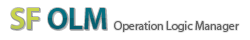

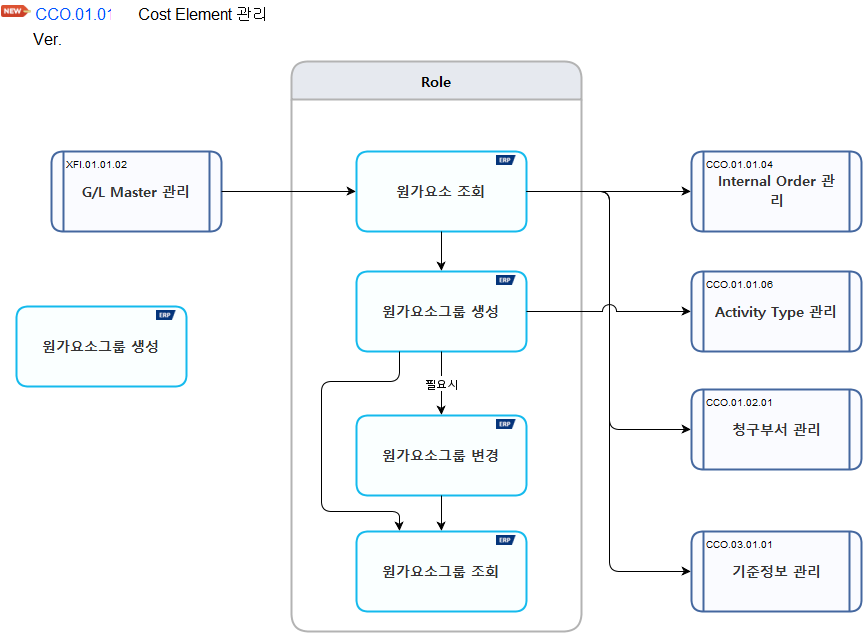

In [16]:
from docx import Document
from PIL import Image
from io import BytesIO

def extract_images_from_docx(docx_file):
    doc = Document(docx_file)
    images = []
    for part in doc.part.package.parts:
        if part.content_type.startswith("image"):
            image_data = part.blob
            image_stream = BytesIO(image_data)
            image = Image.open(image_stream)
            images.append(image)
    return images

# 사용 예시
docx_file = "BPD_Cost Element 관리_20240401101315.docx"  # docx 파일의 경로
images = extract_images_from_docx(docx_file)
for i, image in enumerate(images):
    image.show()


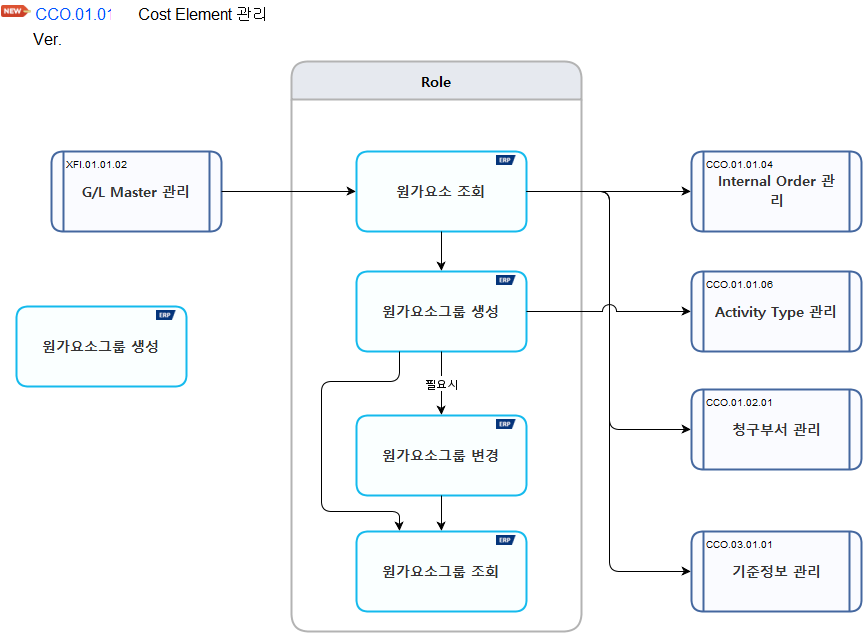

In [18]:
images[2]

In [20]:
!pip install pytesseract

Defaulting to user installation because normal site-packages is not writeable


In [22]:
import pytesseract
from PIL import Image

# 이미지 불러오기
image = Image.open(images[2])

# 이미지를 텍스트로 변환
text = pytesseract.image_to_string(image)

# 변환된 텍스트 출력
print(text)


AttributeError: 'PngImageFile' object has no attribute 'read'

In [24]:
import pytesseract
from PIL import Image

# 이미지 불러오기
image_path = "test.png"  # 이미지 파일의 경로
image = Image.open(image_path)

# 이미지를 텍스트로 변환
text = pytesseract.image_to_string(image)

# 변환된 텍스트 출력
print(text)


TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.